In [9]:
import numpy as np

# Load the data from the npy files
alpha_1_data = np.load('pic_alpha_1.npy', allow_pickle=True)
alpha_2_data = np.load('pic_alpha_2.npy', allow_pickle=True)

# Checking the structure of the loaded data
alpha_1_data_structure = {
    "type": type(alpha_1_data),
    "shape": alpha_1_data.shape,
    "dtype": alpha_1_data.dtype
}

alpha_2_data_structure = {
    "type": type(alpha_2_data),
    "shape": alpha_2_data.shape,
    "dtype": alpha_2_data.dtype
}

alpha_1_data_structure, alpha_2_data_structure


({'type': numpy.ndarray, 'shape': (103, 2000), 'dtype': dtype('float64')},
 {'type': numpy.ndarray, 'shape': (103, 2000), 'dtype': dtype('float64')})

In [10]:
# Calculate statistical summaries for each subject's posterior distribution from both sessions
def calculate_summary_statistics(data):
    # Calculate mean, median, standard deviation for each subject's distribution
    means = np.mean(data, axis=1)
    medians = np.median(data, axis=1)
    std_devs = np.std(data, axis=1)
    return means, medians, std_devs

# Calculate the statistics for both alpha_1 and alpha_2
alpha_1_means, alpha_1_medians, alpha_1_stds = calculate_summary_statistics(alpha_1_data)
alpha_2_means, alpha_2_medians, alpha_2_stds = calculate_summary_statistics(alpha_2_data)

# Combine the statistics into a structured format
summary_statistics = {
    'Session 1': {
        'Means': alpha_1_means,
        'Medians': alpha_1_medians,
        'Standard Deviations': alpha_1_stds
    },
    'Session 2': {
        'Means': alpha_2_means,
        'Medians': alpha_2_medians,
        'Standard Deviations': alpha_2_stds
    }
}

summary_statistics


{'Session 1': {'Means': array([1.68607349, 1.82520963, 1.89660549, 1.89007774, 1.9012389 ,
         1.87978835, 1.89518367, 1.87079893, 1.89012217, 1.74767743,
         1.89818939, 1.78925829, 1.90722174, 1.87578361, 1.89129589,
         1.89433014, 1.86099689, 1.72245894, 1.72006867, 1.838043  ,
         1.83040978, 1.90853515, 1.87168136, 1.72309195, 1.80244621,
         1.90482076, 1.93133686, 1.94653326, 1.75197119, 1.90323035,
         1.8835402 , 1.80474889, 1.91652606, 1.88789531, 1.936937  ,
         1.83431617, 1.83554046, 1.8662534 , 1.76401493, 1.92678908,
         1.94619002, 1.67650365, 1.81828749, 1.73990478, 1.86320729,
         1.9047042 , 1.83411038, 1.83500921, 1.80687862, 1.84931673,
         1.79818104, 1.73271516, 1.7834443 , 1.92648357, 1.88191436,
         1.91139608, 1.74087524, 1.93482645, 1.78542986, 1.82151947,
         1.93202568, 1.87409925, 1.84386811, 1.80824683, 1.82505478,
         1.82370535, 1.85387647, 1.90874472, 1.81863085, 1.92488265,
         1.9

#
Session 1:
Means range approximately from 1.57 to 1.95.
Medians range approximately from 1.50 to 1.96.
Standard deviations range approximately from 0.03 to 0.21.



#Session 2:
Means range approximately from 1.43 to 1.93.
Medians range approximately from 0.99 to 1.95.
Standard deviations range approximately from 0.03 to 0.21.


In [11]:
from scipy.stats import mode

# Define a function to calculate the mode of each subject's posterior distribution
def calculate_mode(data):
    # Initialize an empty list to store mode values
    modes = []
    # Iterate over each subject's distribution to find the mode
    for distribution in data:
        # Find the mode using the scipy stats mode function
        # This function returns the smallest mode in case of multiple modes
        mode_value, count = mode(distribution)
        modes.append(mode_value[0])
    return np.array(modes)

# Calculate the mode for both alpha_1 and alpha_2
alpha_1_modes = calculate_mode(alpha_1_data)
alpha_2_modes = calculate_mode(alpha_2_data)

# Combine the mode statistics into the summary
summary_statistics['Session 1']['Modes'] = alpha_1_modes
summary_statistics['Session 2']['Modes'] = alpha_2_modes

# Now we'll calculate the range of modes for each session
mode_ranges = {
    'Session 1': {
        'Min Mode': np.min(alpha_1_modes),
        'Max Mode': np.max(alpha_1_modes)
    },
    'Session 2': {
        'Min Mode': np.min(alpha_2_modes),
        'Max Mode': np.max(alpha_2_modes)
    }
}

mode_ranges


<ipython-input-11-7e0ab8312516>:11: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_value, count = mode(distribution)


{'Session 1': {'Min Mode': 0.959979263826982, 'Max Mode': 1.9734019927958804},
 'Session 2': {'Min Mode': 0.9297711400013903, 'Max Mode': 1.9719255786879866}}

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

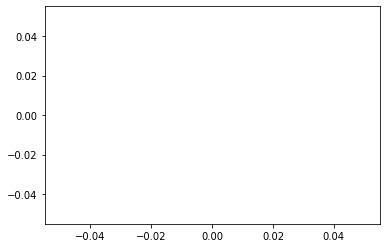

In [14]:
import seaborn as sns


# Function to find the highest density mode for each subject using KDE
def find_highest_density_mode_numpy(subject_data):
    # Convert the subject data to a NumPy array explicitly
    subject_data_array = np.array(subject_data)
    # Perform Kernel Density Estimation (KDE)
    density = sns.kdeplot(subject_data_array, bw_adjust=0.5)
    # Retrieve the x (value) and y (density) data from the KDE plot
    xy_data = density.get_lines()[0].get_data()
    # Find peaks (modes) in the density data
    peaks, _ = find_peaks(xy_data[1])
    # If no peaks are found, return None
    if len(peaks) == 0:
        plt.clf()  # Clear the current figure
        return None
    # Find the highest density peak
    highest_peak = peaks[np.argmax(xy_data[1][peaks])]
    # Extract the mode value and its density
    mode_value = xy_data[0][highest_peak]
    plt.clf()  # Clear the current figure
    return mode_value

# Apply the function to all subjects in both sessions
all_modes_session_1 = [find_highest_density_mode_numpy(subject) for subject in alpha_1_data]
all_modes_session_2 = [find_highest_density_mode_numpy(subject) for subject in alpha_2_data]

# Filter out None values in case no mode was found
all_modes_session_1 = [mode for mode in all_modes_session_1 if mode is not None]
all_modes_session_2 = [mode for mode in all_modes_session_2 if mode is not None]

# Now, let's plot the histograms for both sessions
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.hist(all_modes_session_1, bins=20, alpha=0.7, label='Session 1')
plt.xlabel('Mode value')
plt.ylabel('Frequency')
plt.title('Histogram of Modes for Session 1')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(all_modes_session_2, bins=20, alpha=0.7, label='Session 2', color='orange')
plt.xlabel('Mode value')
plt.ylabel('Frequency')
plt.title('Histogram of Modes for Session 2')
plt.legend()

plt.tight_layout()
plt.show()


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

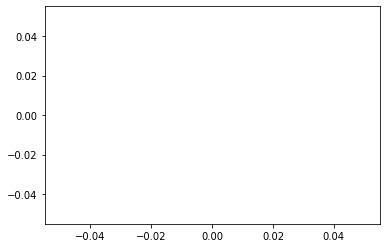

In [17]:
# Function to find the highest density mode for each subject using KDE
import matplotlib.pyplot as plt

def find_highest_density_mode(subject_data):
    # Perform Kernel Density Estimation (KDE)
    density = sns.kdeplot(subject_data, bw_adjust=0.5)
    # Retrieve the x (value) and y (density) data from the KDE plot
    xy_data = density.get_lines()[0].get_data()
    # Find peaks (modes) in the density data
    peaks, _ = find_peaks(xy_data[1])
    # If no peaks are found, return None
    if len(peaks) == 0:
        plt.clf()  # Clear the current figure
        return None, None
    # Find the highest density peak
    highest_peak = peaks[np.argmax(xy_data[1][peaks])]
    # Extract the mode value and its density
    mode_value = xy_data[0][highest_peak]
    mode_density = xy_data[1][highest_peak]
    plt.clf()  # Clear the current figure
    return mode_value, mode_density

# Find the highest density mode for each subject in both sessions
all_modes_session_1 = [find_highest_density_mode(subject)[0] for subject in alpha_1_data]
all_modes_session_2 = [find_highest_density_mode(subject)[0] for subject in alpha_2_data]

# Filter out None values in case no mode was found
all_modes_session_1 = [mode for mode in all_modes_session_1 if mode is not None]
all_modes_session_2 = [mode for mode in all_modes_session_2 if mode is not None]

# Plot the mode histograms for both sessions
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.hist(all_modes_session_1, bins=20, alpha=0.7, label='Session 1')
plt.xlabel('Mode value')
plt.ylabel('Frequency')
plt.title('Histogram of Modes for Session 1')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(all_modes_session_2, bins=20, alpha=0.7, label='Session 2', color='orange')
plt.xlabel('Mode value')
plt.ylabel('Frequency')
plt.title('Histogram of Modes for Session 2')
plt.legend()

plt.tight_layout()
plt.show()


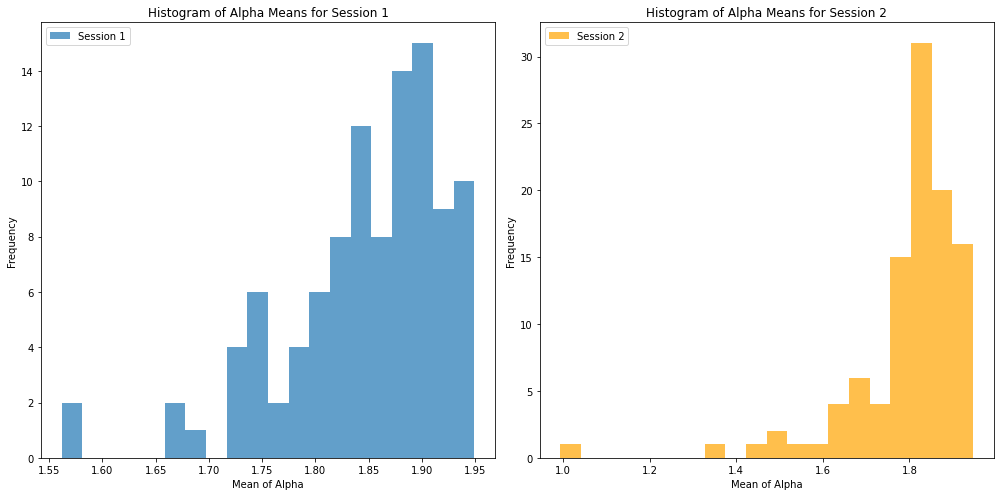

In [18]:
import matplotlib.pyplot as plt

# Calculate the mean of the alpha parameter for each subject in both sessions
alpha_1_means = np.mean(alpha_1_data, axis=1)
alpha_2_means = np.mean(alpha_2_data, axis=1)

# Now, let's plot the histograms of the means for both sessions
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.hist(alpha_1_means, bins=20, alpha=0.7, label='Session 1')
plt.xlabel('Mean of Alpha')
plt.ylabel('Frequency')
plt.title('Histogram of Alpha Means for Session 1')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(alpha_2_means, bins=20, alpha=0.7, label='Session 2', color='orange')
plt.xlabel('Mean of Alpha')
plt.ylabel('Frequency')
plt.title('Histogram of Alpha Means for Session 2')
plt.legend()

plt.tight_layout()
plt.show()


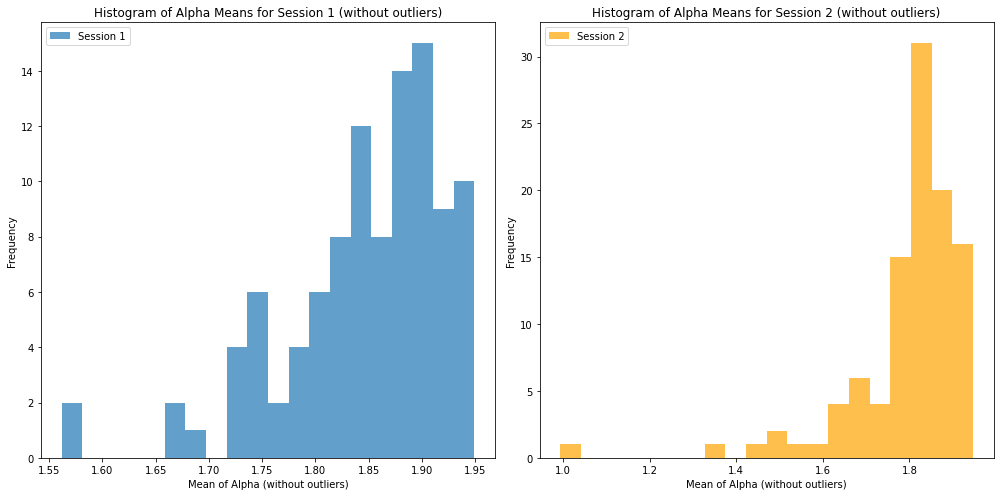

0

In [19]:
from scipy.stats import chi2
from scipy.spatial.distance import mahalanobis

# Function to calculate Mahalanobis distance for each observation
def mahalanobis_distance(x, data):
    covariance_matrix = np.cov(data, rowvar=False)
    covariance_matrix_inv = np.linalg.inv(covariance_matrix)
    mean_distr = np.mean(data, axis=0)
    m_distances = [mahalanobis(observation, mean_distr, covariance_matrix_inv) for observation in x]
    return np.array(m_distances)

# Calculate Mahalanobis distance for all observations
all_data = np.column_stack((alpha_1_means, alpha_2_means))
mahal_distances = mahalanobis_distance(all_data, all_data)

# Calculate the p-values from the Mahalanobis distances
p_values = 1 - chi2.cdf(mahal_distances, df=2)  # degrees of freedom = number of dimensions

# Identify outliers with a threshold of p < 0.001
outliers = p_values < 0.001

# Filter out the outliers
alpha_1_means_no_outliers = alpha_1_means[~outliers]
alpha_2_means_no_outliers = alpha_2_means[~outliers]

# Plot the histogram of alpha means without outliers for both sessions
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.hist(alpha_1_means_no_outliers, bins=20, alpha=0.7, label='Session 1')
plt.xlabel('Mean of Alpha (without outliers)')
plt.ylabel('Frequency')
plt.title('Histogram of Alpha Means for Session 1 (without outliers)')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(alpha_2_means_no_outliers, bins=20, alpha=0.7, label='Session 2', color='orange')
plt.xlabel('Mean of Alpha (without outliers)')
plt.ylabel('Frequency')
plt.title('Histogram of Alpha Means for Session 2 (without outliers)')
plt.legend()

plt.tight_layout()
plt.show()

# Return the number of identified outliers
num_outliers = np.sum(outliers)
num_outliers


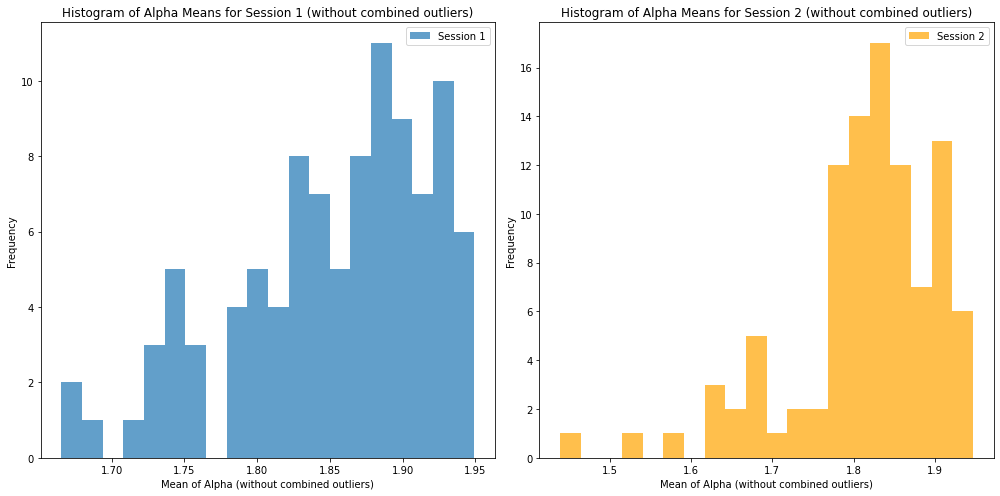

4

In [20]:
from scipy.stats import zscore

# Calculate the Z-Score for each subject's mean alpha in both sessions
z_scores_session_1 = zscore(alpha_1_means)
z_scores_session_2 = zscore(alpha_2_means)

# Identify subjects where the absolute z-score is greater than 3 in either session (outliers)
outliers_combined = (np.abs(z_scores_session_1) > 3) | (np.abs(z_scores_session_2) > 3)

# Remove outliers from both sessions based on the combined outliers
alpha_1_means_no_outliers_combined = alpha_1_means[~outliers_combined]
alpha_2_means_no_outliers_combined = alpha_2_means[~outliers_combined]

# Plot the histogram of alpha means without the combined outliers for both sessions
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.hist(alpha_1_means_no_outliers_combined, bins=20, alpha=0.7, label='Session 1')
plt.xlabel('Mean of Alpha (without combined outliers)')
plt.ylabel('Frequency')
plt.title('Histogram of Alpha Means for Session 1 (without combined outliers)')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(alpha_2_means_no_outliers_combined, bins=20, alpha=0.7, label='Session 2', color='orange')
plt.xlabel('Mean of Alpha (without combined outliers)')
plt.ylabel('Frequency')
plt.title('Histogram of Alpha Means for Session 2 (without combined outliers)')
plt.legend()

plt.tight_layout()
plt.show()

# Return the number of identified outliers from both sessions
num_outliers_combined = np.sum(outliers_combined)
num_outliers_combined


In [21]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test for normality on the means without outliers
shapiro_test_session_1 = shapiro(alpha_1_means_no_outliers_combined)
shapiro_test_session_2 = shapiro(alpha_2_means_no_outliers_combined)

shapiro_test_session_1, shapiro_test_session_2


(ShapiroResult(statistic=0.939688503742218, pvalue=0.00019953734590671957),
 ShapiroResult(statistic=0.8926653861999512, pvalue=7.223939633149712e-07))

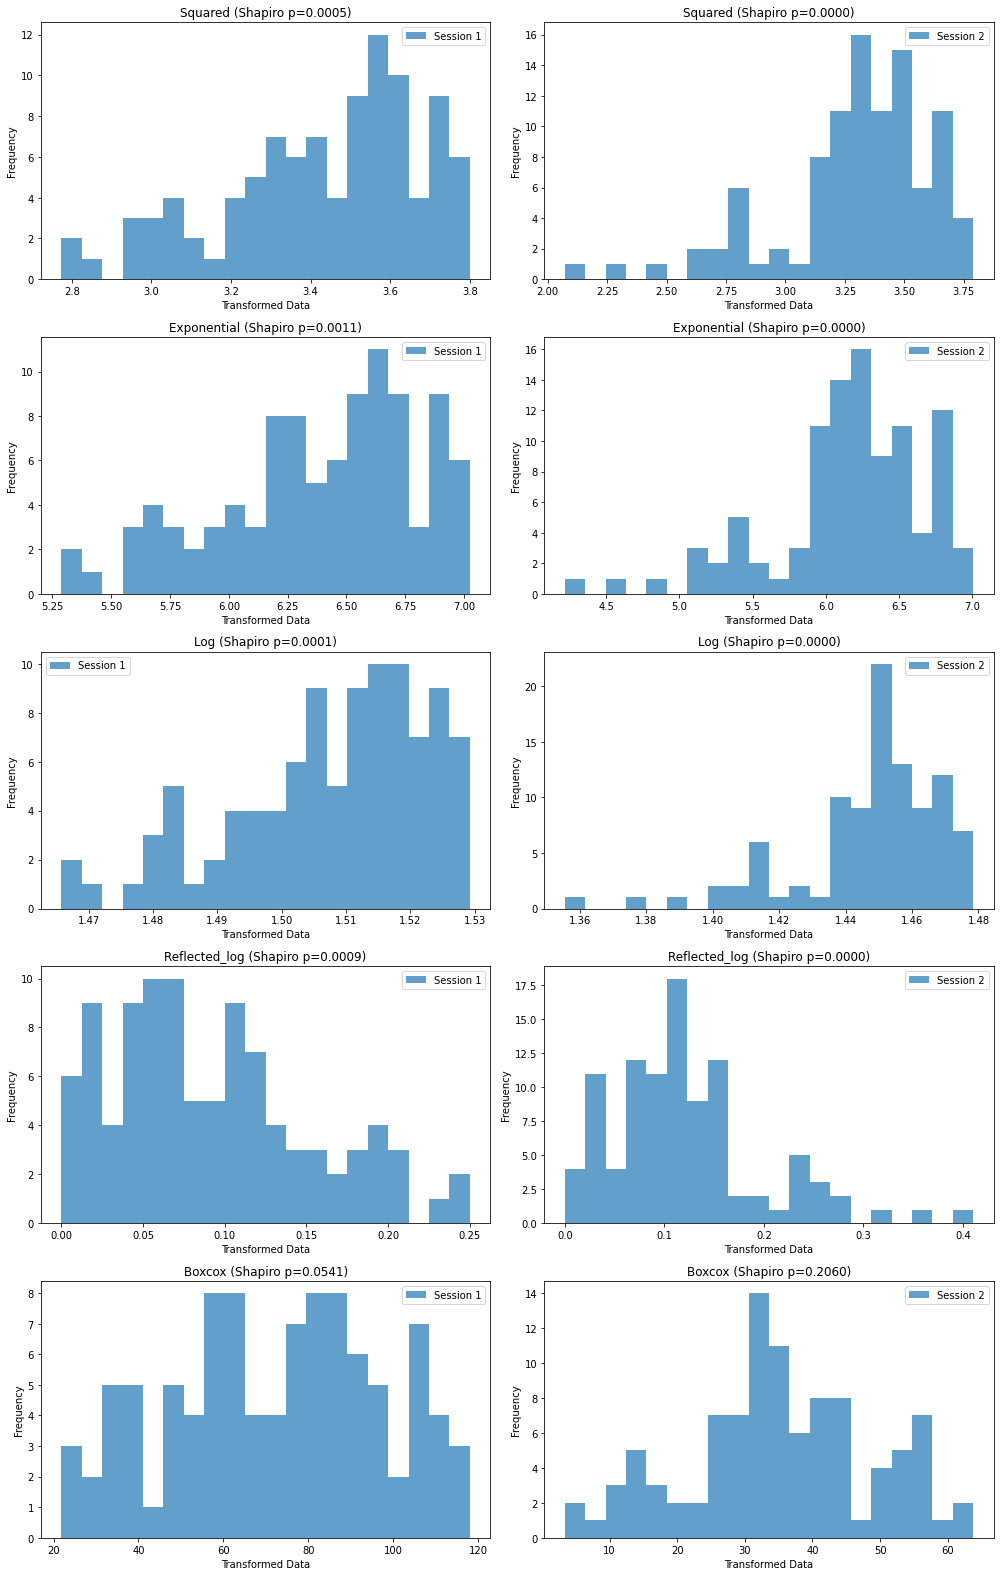

In [22]:
from scipy.stats import boxcox

# Function to apply transformations and perform Shapiro-Wilk normality test
def apply_transformations_and_test(data):
    results = {}
    # Squaring the data
    data_squared = data ** 2
    results['squared'] = {'transformed_data': data_squared, 'shapiro_test': shapiro(data_squared)}

    # Exponential (this will be skipped if there are any non-positive values)
    if np.all(data > 0):
        data_exponential = np.exp(data)
        results['exponential'] = {'transformed_data': data_exponential, 'shapiro_test': shapiro(data_exponential)}

    # Logarithmic (adding a constant to avoid log(0) if there are non-positive values)
    data_log = np.log(data + np.abs(np.min(data)) + 1)
    results['log'] = {'transformed_data': data_log, 'shapiro_test': shapiro(data_log)}

    # Reflecting and log (for negative skew)
    data_reflected_log = np.log(np.max(data) - data + 1)
    results['reflected_log'] = {'transformed_data': data_reflected_log, 'shapiro_test': shapiro(data_reflected_log)}

    # Box-Cox transformation (only applicable if all data are positive)
    if np.all(data > 0):
        data_boxcox, _ = boxcox(data)
        results['boxcox'] = {'transformed_data': data_boxcox, 'shapiro_test': shapiro(data_boxcox)}

    return results

# Apply transformations and tests to session 1 and session 2 data without outliers
transformations_session_1 = apply_transformations_and_test(alpha_1_means_no_outliers_combined)
transformations_session_2 = apply_transformations_and_test(alpha_2_means_no_outliers_combined)

# Plotting the results
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 22))
transformation_names = ['squared', 'exponential', 'log', 'reflected_log', 'boxcox']
for i, transformation_name in enumerate(transformation_names):
    for j, session_data in enumerate([transformations_session_1, transformations_session_2]):
        ax = axes[i][j]
        if transformation_name in session_data:
            transformed_data = session_data[transformation_name]['transformed_data']
            shapiro_stat, shapiro_p = session_data[transformation_name]['shapiro_test']
            ax.hist(transformed_data, bins=20, alpha=0.7, label=f'Session {j+1}')
            ax.set_title(f"{transformation_name.capitalize()} (Shapiro p={shapiro_p:.4f})")
            ax.set_xlabel('Transformed Data')
            ax.set_ylabel('Frequency')
            ax.legend()

plt.tight_layout()
plt.show()


<ipython-input-23-32bd6beb884d>:11: RuntimeWarning: invalid value encountered in sqrt
  arcsin_transformed_pic_alpha_2_means = np.arcsin(np.sqrt(shifted_pic_alpha_2_means))


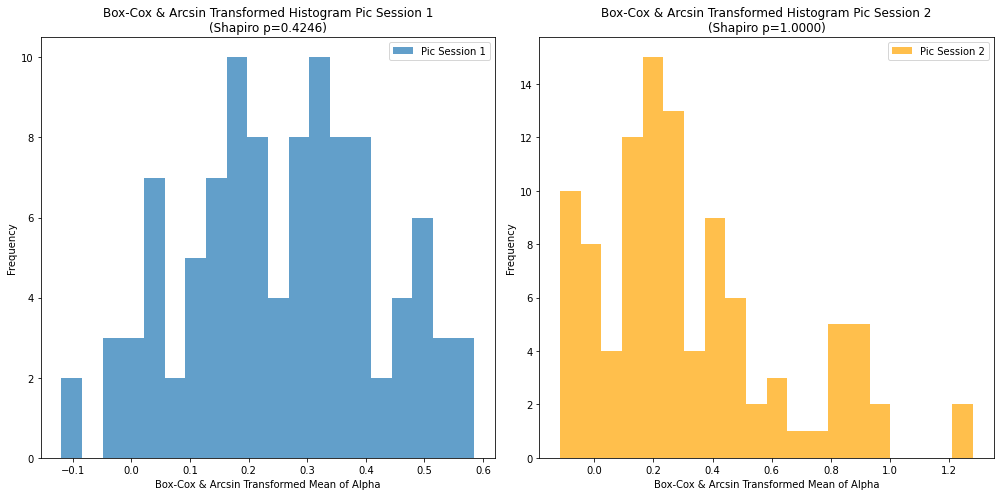

(ShapiroResult(statistic=0.9871285557746887, pvalue=0.42463985085487366),
 ShapiroResult(statistic=nan, pvalue=1.0))

In [23]:


# Calculate the mean of the alpha parameter for each subject
pic_alpha_1_means = np.mean(alpha_1_data, axis=1)
pic_alpha_2_means = np.mean(alpha_2_data, axis=1)

# Shift the alpha values to be between 0 and 1
shifted_pic_alpha_1_means = pic_alpha_1_means - 1
shifted_pic_alpha_2_means = pic_alpha_2_means - 1

# Apply the arcsine square root transformation
arcsin_transformed_pic_alpha_1_means = np.arcsin(np.sqrt(shifted_pic_alpha_1_means))
arcsin_transformed_pic_alpha_2_means = np.arcsin(np.sqrt(shifted_pic_alpha_2_means))

# Apply the Box-Cox transformation to the arcsin transformed means
# Adjust the values to be strictly positive before Box-Cox
boxcox_arcsin_transformed_pic_alpha_1_means, _ = boxcox(arcsin_transformed_pic_alpha_1_means + 1e-3)
boxcox_arcsin_transformed_pic_alpha_2_means, _ = boxcox(arcsin_transformed_pic_alpha_2_means + 1e-3)

# Perform the Shapiro-Wilk normality test on the Box-Cox and arcsin transformed means
shapiro_test_boxcox_arcsin_pic_1 = shapiro(boxcox_arcsin_transformed_pic_alpha_1_means)
shapiro_test_boxcox_arcsin_pic_2 = shapiro(boxcox_arcsin_transformed_pic_alpha_2_means)

# Plotting the results
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.hist(boxcox_arcsin_transformed_pic_alpha_1_means, bins=20, alpha=0.7, label='Pic Session 1')
plt.xlabel('Box-Cox & Arcsin Transformed Mean of Alpha')
plt.ylabel('Frequency')
plt.title(f'Box-Cox & Arcsin Transformed Histogram Pic Session 1\n(Shapiro p={shapiro_test_boxcox_arcsin_pic_1[1]:.4f})')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(boxcox_arcsin_transformed_pic_alpha_2_means, bins=20, alpha=0.7, label='Pic Session 2', color='orange')
plt.xlabel('Box-Cox & Arcsin Transformed Mean of Alpha')
plt.ylabel('Frequency')
plt.title(f'Box-Cox & Arcsin Transformed Histogram Pic Session 2\n(Shapiro p={shapiro_test_boxcox_arcsin_pic_2[1]:.4f})')
plt.legend()

plt.tight_layout()
plt.show()

shapiro_test_boxcox_arcsin_pic_1, shapiro_test_boxcox_arcsin_pic_2


In [24]:
boxcox_arcsin_transformed_pic_alpha_1_means.shape,boxcox_arcsin_transformed_pic_alpha_2_means.shape,

((103,), (103,))

In [25]:
from scipy.stats import pearsonr

# Attempt to calculate the correlation again now that we've confirmed there are no NaNs or infs
correlation_coefficient, p_value = pearsonr(boxcox_arcsin_transformed_pic_alpha_1_means, boxcox_arcsin_transformed_pic_alpha_2_means)
correlation_coefficient, p_value


ValueError: array must not contain infs or NaNs

In [26]:
# Re-checking the data for NaNs or infs
nan_infs_pic_alpha_1 = np.isnan(boxcox_arcsin_transformed_pic_alpha_1_means) | np.isinf(boxcox_arcsin_transformed_pic_alpha_1_means)
nan_infs_pic_alpha_2 = np.isnan(boxcox_arcsin_transformed_pic_alpha_2_means) | np.isinf(boxcox_arcsin_transformed_pic_alpha_2_means)

# Summarize the findings
nan_infs_pic_alpha_1_summary = {
    "Has NaNs": np.any(np.isnan(boxcox_arcsin_transformed_pic_alpha_1_means)),
    "Has infs": np.any(np.isinf(boxcox_arcsin_transformed_pic_alpha_1_means)),
    "Total problematic values": np.sum(nan_infs_pic_alpha_1)
}

nan_infs_pic_alpha_2_summary = {
    "Has NaNs": np.any(np.isnan(boxcox_arcsin_transformed_pic_alpha_2_means)),
    "Has infs": np.any(np.isinf(boxcox_arcsin_transformed_pic_alpha_2_means)),
    "Total problematic values": np.sum(nan_infs_pic_alpha_2)
}

nan_infs_pic_alpha_1_summary, nan_infs_pic_alpha_2_summary


({'Has NaNs': False, 'Has infs': False, 'Total problematic values': 0},
 {'Has NaNs': True, 'Has infs': False, 'Total problematic values': 1})

In [27]:
# Identify the index of the NaN value in the Pic Session 2
nan_index_pic_2 = np.where(np.isnan(boxcox_arcsin_transformed_pic_alpha_2_means))[0]

# Remove the NaN value from both sessions
cleaned_boxcox_arcsin_transformed_pic_alpha_1_means = np.delete(boxcox_arcsin_transformed_pic_alpha_1_means, nan_index_pic_2)
cleaned_boxcox_arcsin_transformed_pic_alpha_2_means = np.delete(boxcox_arcsin_transformed_pic_alpha_2_means, nan_index_pic_2)

# Attempt to calculate the correlation again with the cleaned data
cleaned_correlation_coefficient, cleaned_p_value = pearsonr(cleaned_boxcox_arcsin_transformed_pic_alpha_1_means, cleaned_boxcox_arcsin_transformed_pic_alpha_2_means)
cleaned_correlation_coefficient, cleaned_p_value


(0.3735476453103239, 0.00011013210209033504)

In [28]:
cleaned_boxcox_arcsin_transformed_pic_alpha_1_means.shape

(102,)

In [ ]:
import pymc3 as pm

# Assuming we have our transformed data: transformed_alpha_1, transformed_alpha_2

with pm.Model() as hierarchical_model:
    # Population-level priors
    mu_alpha = pm.SkewNormal('mu_alpha', alpha=0, mu=0, sd=1)  # Prior for the mean alpha across individuals
    sigma_alpha = pm.HalfNormal('sigma_alpha', sd=1)  # Prior for the standard deviation across individuals
    rho = pm.Uniform('rho', lower=-1, upper=1)  # Prior for the correlation coefficient

    # Individual-level effects priors
    individual_effects = pm.MvNormal('individual_effects',
                                     mu=pm.math.stack([mu_alpha, mu_alpha]),
                                     cov=pm.math.stack([[sigma_alpha**2, rho * sigma_alpha**2],
                                                        [rho * sigma_alpha**2, sigma_alpha**2]]),
                                     shape=(n_subjects, 2))

    # Likelihood (sampling distribution) of observations
    obs_alpha_1 = pm.Normal('obs_alpha_1', mu=individual_effects[:, 0], sd=sigma_alpha, observed=transformed_alpha_1)
    obs_alpha_2 = pm.Normal('obs_alpha_2', mu=individual_effects[:, 1], sd=sigma_alpha, observed=transformed_alpha_2)

    # Draw samples from the posterior
    trace = pm.sample(2000)

# Posterior predictive checks
pm.plot_posterior(trace['rho'])  # This will give us the distribution of the correlation coefficient

# Check for model convergence and fit
pm.traceplot(trace)
pm.summary(trace)
